[[<AxesSubplot:title={'center':'PhraseId'}>
  <AxesSubplot:title={'center':'SentenceId'}>]
 [<AxesSubplot:title={'center':'Sentiment'}> <AxesSubplot:>]]
   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64
2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Na

0         1
1         2
2         2
3         2
4         2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 156060, dtype: int64

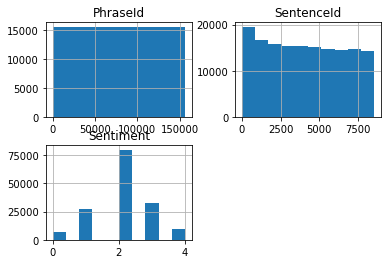

In [11]:
import pandas as pd
 
movie = pd.read_csv('/home/jimbrootan/Desktop/ML_data/sentiment-analysis-on-movie-reviews/train.tsv'
                     ,delimiter="\t",header=0)
print(movie.hist())
print(movie.head())
print(movie['Sentiment'].describe())
print(movie['Sentiment'].value_counts()/movies['Sentiment'].count())
movie.Sentiment

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

def main():
    
    pipeline=Pipeline([
        ('vect',TfidfVectorizer(stop_words='English')),
        ('clf',LogisticRegression(max_iter=10000))
    ])
    
    parameters={
        'vect__max_df':(0.25,0.5),
        'vect__ngram_range':((1,1),(1,2)),
        'vect__use_idf':(True,False),
        'clf__c':(0.1,1,10)
    }
    X,y=movie['Phrase'],movie['Sentiment'].to_numpy()
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5)
    grid_serch=GridSearchCV(pipeline,parameters,verbose=1,n_jobs=3,scoring='accuracy',cv=3)
    grid_serch.fit(X_train,y_train)
    print('best  Score : %.3f'%grid_serch.best_score_)
    print("\n best parametes value: ")
    best_params=grid_serch.best_estimator_.get_params()
    
    
    for param_name in sorted(parameters.keys()):
        print('t%s : %r'%(param_name,best_params[param_name]))

if __name__ == '__main__':
    main() 
    
    
        
        
if __name__== '__main__':
    main()





Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


ValueError: Invalid parameter c for estimator LogisticRegression(max_iter=10000). Check the list of available parameters with `estimator.get_params().keys()`.